In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

covid_df = pd.read_csv('data/covid_df.csv')
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100

display(covid_df.head())
covid_df.info()

,Unnamed: 0,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,lethal_rate,recovery_rate,death_rate
0,0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86785 entries, 0 to 86784
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Unnamed: 0                           86785 non-null  int64         
 1   date                                 86785 non-null  datetime64[ns]
 2   country                              86785 non-null  object        
 3   confirmed                            86785 non-null  float64       
 4   deaths                               86785 non-null  float64       
 5   recovered                            86785 non-null  float64       
 6   active                               86785 non-null  float64       
 7   daily_confirmed                      86564 non-null  float64       
 8   daily_deaths                         86564 non-null  float64       
 9   daily_recovered                      86564 non-null  float64       
 10  total_vacc

In [27]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
cropped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Russia', 37664517],
    ['Australia', 83721496],
    ['Germany', 145975300],
    ['Canada', 25726900],
    ['United Kingdom', 67802690]
],
columns= ['country', 'population']
)

cropped_covid_df = cropped_covid_df.merge(populations, on=['country'])
cropped_covid_df['daily_confirmed_per_hundred'] = cropped_covid_df['daily_confirmed'] / cropped_covid_df['population'] * 100
cropped_covid_df.head()

,Unnamed: 0,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,...,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,lethal_rate,recovery_rate,death_rate,population,daily_confirmed_per_hundred
0,3616,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83721496,NaN
1,3617,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,83721496,0.000005
2,3618,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,83721496,0.000000
3,3619,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,83721496,0.000001
4,3620,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,83721496,0.000000


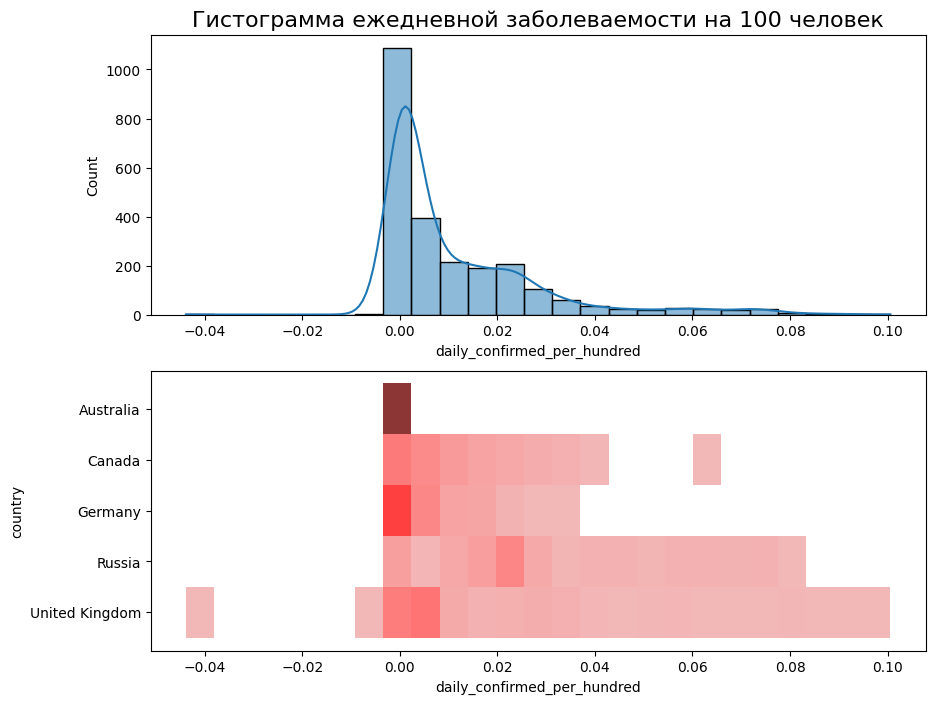

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=cropped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);

axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)

sns.histplot(
    data=cropped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1] 
);

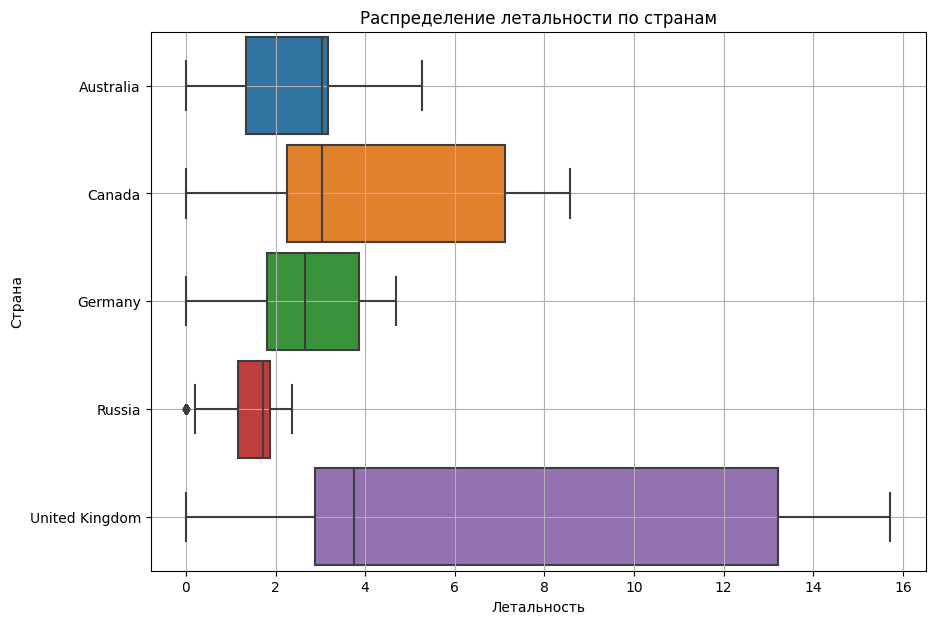

In [29]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=cropped_covid_df,
    x='death_rate',
    y='country',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам')
boxplot.set_xlabel('Летальность')
boxplot.set_ylabel('Страна')
boxplot.grid()

Text(0.5, 1.0, 'Средний процент болеющего населения по кварталам')

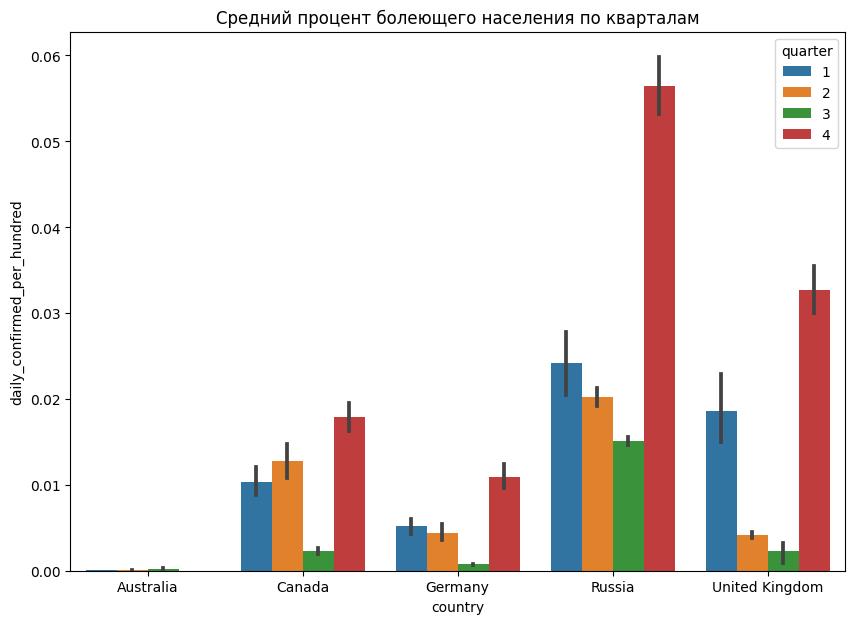

In [30]:
fig = plt.figure(figsize= (10, 7))
cropped_covid_df['quarter'] = cropped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=cropped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter'
    
);
barplot.set_title('Средний процент болеющего населения по кварталам')

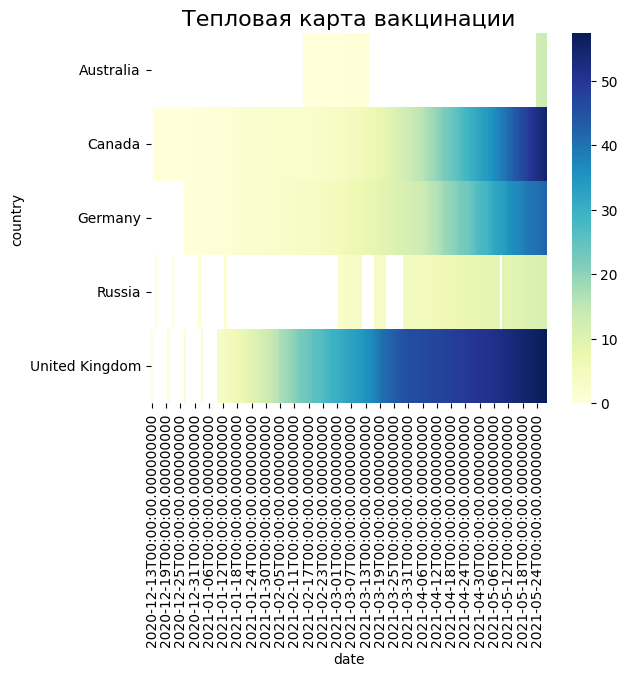

In [31]:
pivot = cropped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country'
)
pivot.columns.astype('string')

heatmap = sns.heatmap(
    data=pivot,
    cmap='YlGnBu'
)
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

Text(0.5, 1.0, 'Динамика роста заболевания в % от общего населения')

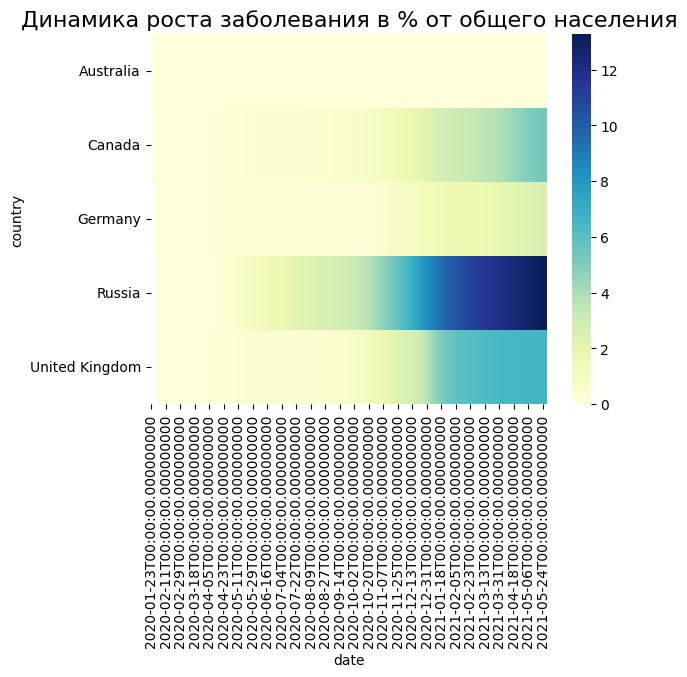

In [32]:
cropped_covid_df['confirmed_per_hundred'] = cropped_covid_df['confirmed'] / cropped_covid_df['population'] * 100

pivot = cropped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    index='country',
    columns='date'
)
pivot.columns.astype('string')

heatmap= sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Динамика роста заболевания в % от общего населения', fontsize=16)

In [ ]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=cropped_covid_df,
    x='death_rate',
    y='country',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам')
boxplot.set_xlabel('Летальность')
boxplot.set_ylabel('Страна')
boxplot.grid()

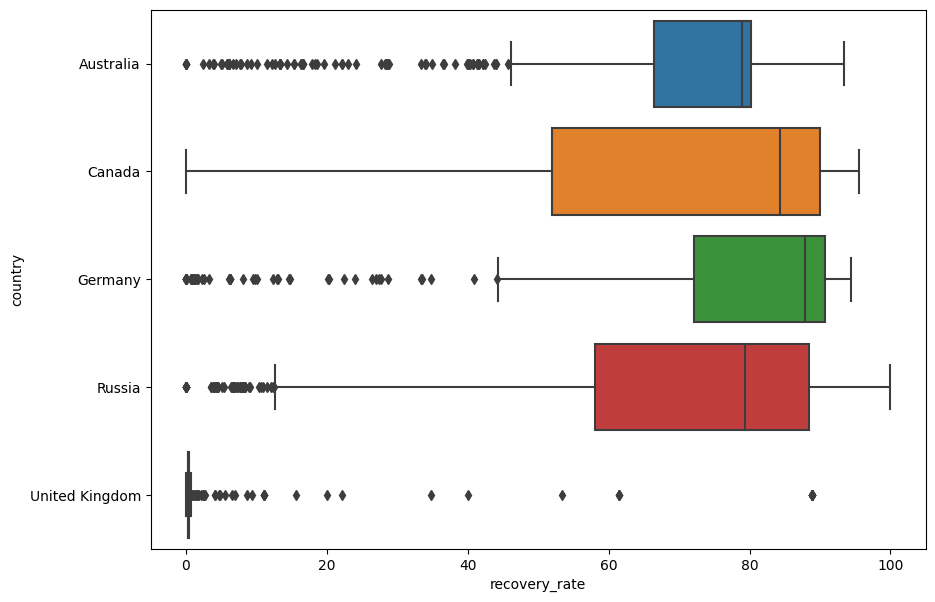

In [34]:
fig = plt.figure(figsize= (10, 7))
boxplot = sns.boxplot(
    data=cropped_covid_df,
    x='recovery_rate',
    y='country',
    orient= 'h'
)